In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500,n_features=2,centers = 5,random_state=20)

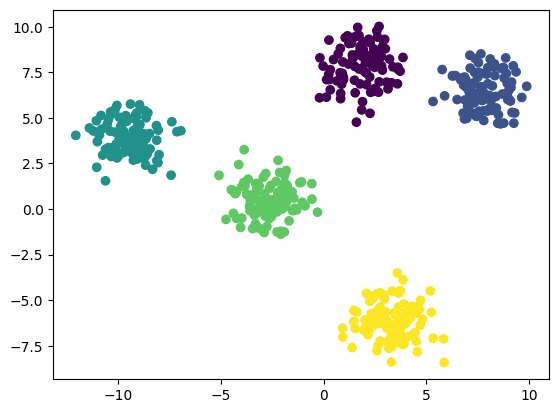

In [3]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [4]:
def initialize_cluster(k = 2,n_features = 2,min = -10,max = 10):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster['center'] = (max-min)*np.random.rand(n_features)+min
        cluster['points'] = []
        clusters.append(cluster)
    return clusters

In [6]:
clusters = initialize_cluster(5,2,np.array([-10,-7.5]),np.array([10,10]))
clusters

[{'center': array([-1.02236806,  3.89277831]), 'points': []},
 {'center': array([-1.40787202, -5.15601382]), 'points': []},
 {'center': array([1.02316256, 6.8697088 ]), 'points': []},
 {'center': array([4.77560134, 8.01608963]), 'points': []},
 {'center': array([ 8.45883404, -0.0513773 ]), 'points': []}]

In [7]:
def distance(p1,p2):
    return np.sqrt(np.sum((p2-p1)**2))

In [10]:
def assign_points(X,clusters):
    for i in range(X.shape[0]):
        dist = []
        for c in clusters:
            dist.append(distance(X[i],c['center']))

        clusters[np.argmin(dist)]['points'].append(X[i])

In [11]:
assign_points(X,clusters)
clusters

[{'center': array([-1.02236806,  3.89277831]),
  'points': [array([-4.49009116,  1.05572831]),
   array([-10.33188218,   5.19726225]),
   array([-10.3540145 ,   5.32683156]),
   array([-4.12555975,  2.4397487 ]),
   array([-5.08617397,  1.84880819]),
   array([-2.8132828 ,  1.94473949]),
   array([-9.56253716,  4.86143849]),
   array([-9.64722873,  3.53316294]),
   array([-9.25740233,  4.30180278]),
   array([-3.37128375, -0.3250539 ]),
   array([-9.08089007,  5.09269571]),
   array([-8.31693442,  2.17769771]),
   array([-3.82397809,  1.2578119 ]),
   array([-9.5798228 ,  3.98878284]),
   array([-2.04619499,  1.07163662]),
   array([-2.64993547, -0.53026019]),
   array([-8.12570561,  4.57510771]),
   array([-4.25498327,  0.91334429]),
   array([-10.03916333,   2.98004824]),
   array([-9.02519571,  4.59657159]),
   array([-2.54899281, -0.42922033]),
   array([-11.04524438,   4.84244716]),
   array([-10.45317024,   4.91910401]),
   array([-1.92712183,  1.01107666]),
   array([-8.04240815

In [12]:
def plot_clusters(clusters):
    for cluster in clusters:
        if len(cluster['points']) != 0:
            p = np.array(cluster['points'])
            plt.scatter(p[:,0],p[:,1])
        c = cluster['center']
        plt.scatter(c[0],c[1],c = 'black')
    plt.show()

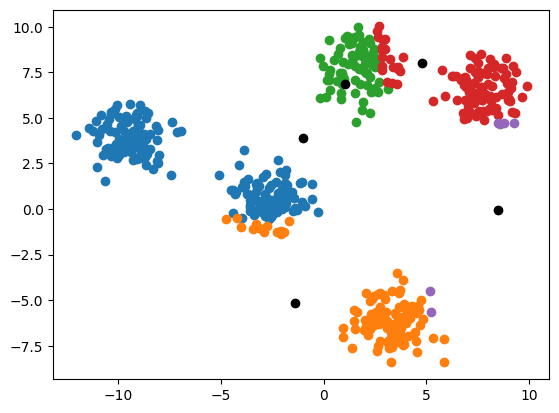

In [13]:
plot_clusters(clusters)

In [17]:
def update_clusters(clusters):
    is_updated = False
    for cluster in clusters:
        if len(cluster['points']) != 0:
            new_center = np.mean(cluster['points'],axis = 0)
            if np.any(new_center != cluster['center']):
                is_updated = True
                cluster['center'] = new_center
            
            cluster['points'] = []
    return is_updated

In [18]:
# np.array([1,2,3]) == np.array([3,2,3])

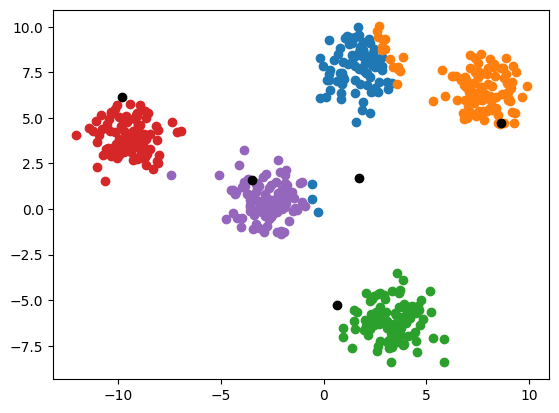

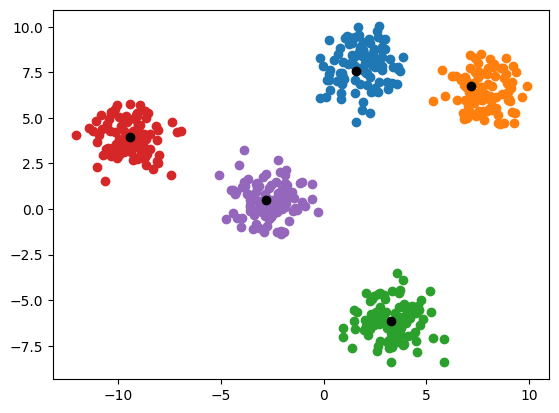

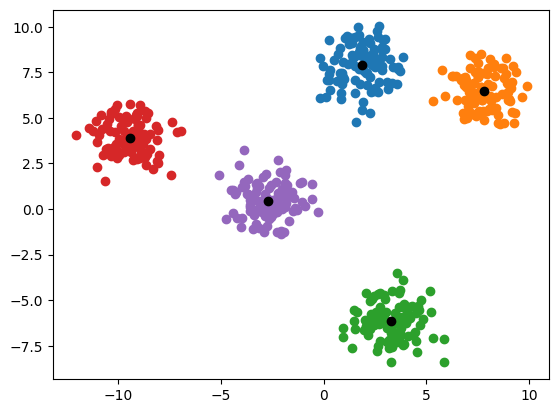

In [20]:
clusters = initialize_cluster(k = 5,n_features=2,min = np.min(X,axis = 0),max = np.max(X,axis = 0))
for i in range(10):
    assign_points(X,clusters)
    plot_clusters(clusters)
    is_updated = update_clusters(clusters)
    if is_updated == False:
        break

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
clf = KMeans(n_clusters=5)

In [23]:
clf.fit(X)

KMeans(n_clusters=5)

In [24]:
clf.inertia_

944.4282081113831

In [25]:
clf.cluster_centers_

array([[ 1.86103043,  7.92313022],
       [ 3.28857717, -6.15519417],
       [-9.41045484,  3.90984505],
       [ 7.78664491,  6.45659035],
       [-2.70399202,  0.46108905]])

In [35]:
# clf.predict(X)

In [26]:
sil = []
wcss = []
for i in range(2,10):
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    wcss.append(clf.inertia_)
    sil.append(silhouette_score(X,clf.predict(X)))

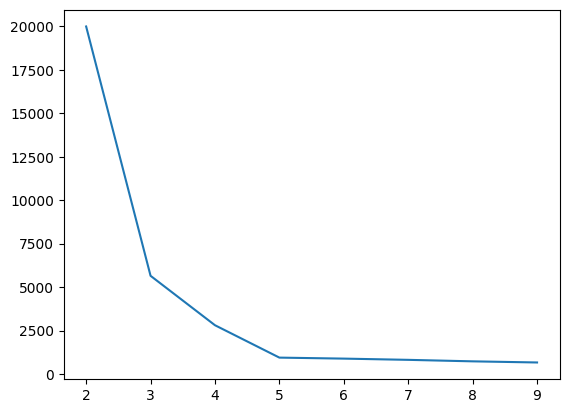

In [27]:
plt.plot([i for i in range(2,10)],wcss)

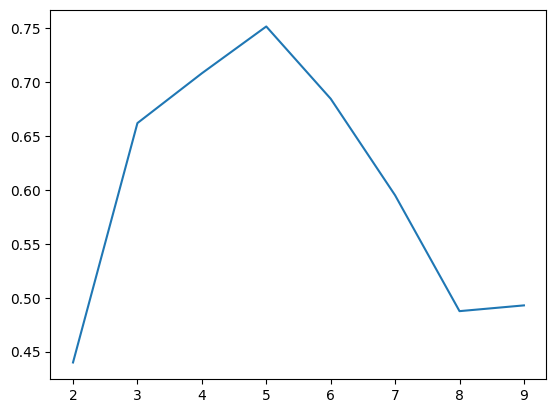

In [38]:
plt.plot([i for i in range(2,10)],sil)

In [ ]:
clf